In this classification project, the dataset [diabetes_012_health_indicators_BRFSS2015.csv](https://www.kaggle.com/datasets) is utilized, which contains 253,680 clean survey responses from the CDC's 2015 Behavioral Risk Factor Surveillance System (BRFSS).

The target variable, Diabetes_012, consists of three classes:

0: No diabetes or only during pregnancy  
1: Prediabetes  
2: Diabetes

Additionally, the dataset comprises 21 feature variables. Several steps will be followed to select and optimize models for high performance and accuracy.


In [11]:
# Install the imbalanced-learn library for handling and analyzing imbalanced datasets
!pip install imblearn

# Install the XGBoost library for model building and prediction using the XGBoost algorithm
!pip install xgboost


<h1 style="color:pink;">1. Import Required Libraries</h1>

In [12]:
# Import essential libraries
import pandas as pd  # for handling data in DataFrame format
import numpy as np  # for numerical operations and array manipulation
import matplotlib.pyplot as plt  # for creating basic plots and visualizations
import seaborn as sns  # for enhanced visualizations and specific plot styles

<h1 style="color:pink;">2. Load Dataset</h1>


In [13]:
# Load the dataset into a DataFrame from a CSV file
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Display the first 5 rows of the DataFrame to get an overview of the data
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


<h1 style="color:pink;">3. Data Exploratory Analysis (DEA) </h1>

In [14]:
# Display the number of rows (samples) and columns (features) in the dataset
df.shape


(253680, 22)

In [15]:
# Display basic information about the dataset, such as column names, data types, and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [16]:
# Display the statistical summary of the dataset, including count, mean, std, min, 25th percentile, median, 75th percentile, and max for each numerical column
df.describe()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<h1 style="color:pink;">4. Data Visualization</h1>

C:\Users\anndi\AppData\Local\Temp\ipykernel_17620\3903252009.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Diabetes_012", palette="viridis")


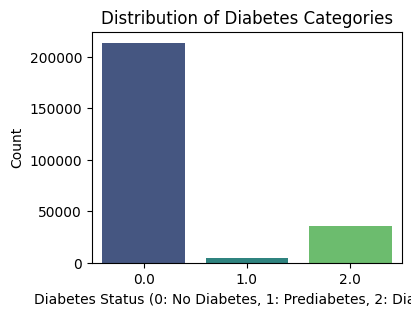

In [17]:
# 1. Distribution of Diabetes_012 categories
# Create a figure with a specific size
plt.figure(figsize=(4, 3))

# Create a count plot for the "Diabetes_012" column
sns.countplot(data=df, x="Diabetes_012", palette="viridis")

# Set the title of the plot
plt.title("Distribution of Diabetes Categories")

# Label the x-axis
plt.xlabel("Diabetes Status (0: No Diabetes, 1: Prediabetes, 2: Diabetes)")

# Label the y-axis
plt.ylabel("Count")

# Display the plot
plt.show()

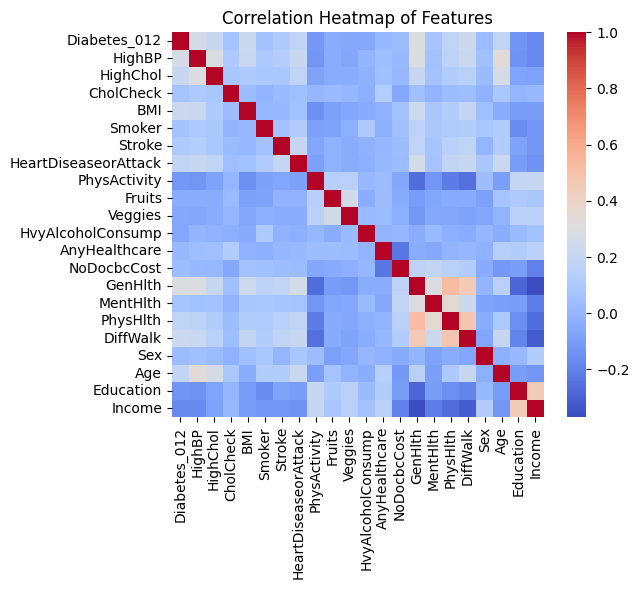

In [18]:
# 2. Correlation heatmap
# Create a figure with a specific size
plt.figure(figsize=(6, 5))

# Calculate the correlation matrix of the dataframe
corr = df.corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr, annot=False, cmap="coolwarm", cbar=True, fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Features")

# Display the heatmap
plt.show()
